In [1]:
pip install tensorflow opencv-python numpy scikit-learn pandas matplotlib seaborn kaggle


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

DATASET_PATH = "ISL Gesture dataset"

IMG_SIZE = 64
images = []
labels = []
gesture_label_map = {}  

label_counter = 0  

for gesture_folder in sorted(os.listdir(DATASET_PATH)):
    gesture_folder_path = os.path.join(DATASET_PATH, gesture_folder)
    
    if os.path.isdir(gesture_folder_path):
        print(f"Processing gesture: {gesture_folder}")
        
        for dynamic_folder in os.listdir(gesture_folder_path):
            dynamic_folder_path = os.path.join(gesture_folder_path, dynamic_folder)
            
            if os.path.isdir(dynamic_folder_path):
                for list_folder in ['Gallery_list', 'Probe_list']:
                    list_folder_path = os.path.join(dynamic_folder_path, list_folder)
                    
                    if os.path.exists(list_folder_path):
                        # Traverse 'set1', 'set2', etc.
                        for set_folder in os.listdir(list_folder_path):
                            set_folder_path = os.path.join(list_folder_path, set_folder)
                            
                            if os.path.isdir(set_folder_path):
                                for img_file in os.listdir(set_folder_path):
                                    img_path = os.path.join(set_folder_path, img_file)
                                    image = cv2.imread(img_path)
                                    
                                    if image is None:
                                        print(f"Skipping invalid or unreadable image: {img_path}")
                                        continue
                                    
                                    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                                    resized_image = cv2.resize(gray_image, (IMG_SIZE, IMG_SIZE))
                                    normalized_image = resized_image / 255.0

                                    gesture_name = dynamic_folder.split('_')[0]
                                    
                                    if gesture_name not in gesture_label_map:
                                        gesture_label_map[gesture_name] = label_counter
                                        label_counter += 1
                                    
                                    images.append(normalized_image)
                                    labels.append(gesture_label_map[gesture_name])

if len(images) == 0:
    raise ValueError("No valid images found in the dataset. Please check the dataset path and structure.")
else:
    print(f"Loaded {len(images)} images.")

X = np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = to_categorical(np.array(labels), num_classes=len(gesture_label_map))  # One-hot encode labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dataset loaded: {X_train.shape[0]} training samples, {X_test.shape[0]} testing samples.")
print(f"Label mapping: {gesture_label_map}")


Processing gesture: ISL_G001
Processing gesture: ISL_G002
Processing gesture: ISL_G003
Processing gesture: ISL_G004
Skipping invalid or unreadable image: ISL Gesture dataset/ISL_G004/AFRAID_Dynamic/Gallery_list/set1/dl reversecnn.ipynb
Processing gesture: ISL_G005
Processing gesture: ISL_G006
Processing gesture: ISL_G007
Processing gesture: ISL_G008
Processing gesture: ISL_G009
Processing gesture: ISL_G010
Processing gesture: ISL_G011
Processing gesture: ISL_G012
Processing gesture: ISL_G013
Processing gesture: ISL_G014
Processing gesture: ISL_G015
Processing gesture: ISL_G016
Processing gesture: ISL_G017
Processing gesture: ISL_G018
Processing gesture: ISL_G019
Processing gesture: ISL_G020
Processing gesture: ISL_G021
Processing gesture: ISL_G022
Processing gesture: ISL_G023
Loaded 49732 images.
Dataset loaded: 39785 training samples, 9947 testing samples.
Label mapping: {'ABOVE': 0, 'ACROSS': 1, 'ADVANCE': 2, 'AFRAID': 3, 'ALL': 4, 'ALONE': 5, 'ARISE': 6, 'BAG': 7, 'BELOW': 8, 'BRING

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

IMG_SIZE = 64
NUM_CLASSES = len(gesture_label_map) 
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES, activation='softmax'))  

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32
)

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.2f}")

/home/eshu/Downloads/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-19 19:49:35.619937: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 62, 62, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 29, 29, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 23)             │         5,911 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,279,383 (4.88 MB)

 Trainable params: 1,278,935 (4.88 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/30
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 206s 164ms/step - accuracy: 0.8476 - loss: 0.6490 - val_accuracy: 1.0000 - val_loss: 5.1472e-04
Epoch 2/30
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 187s 150ms/step - accuracy: 0.9974 - loss: 0.0096 - val_accuracy: 1.0000 - val_loss: 9.9452e-05
Epoch 3/30
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 205s 164ms/step - accuracy: 0.9988 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 2.7907e-05
Epoch 4/30
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 256s 160ms/step - accuracy: 0.9994 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 7.3290e-06
Epoch 5/30
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 249s 200ms/step - accuracy: 0.9995 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 5.2806e-06
Epoch 6/30
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 240s 193ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 1.2769e-06
Epoch 7/30
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 220s 177ms/step - accuracy: 0.9995 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 4.4839e-06
Epoch 8/30
1244/1244 ━━━━━━━━━━━━━

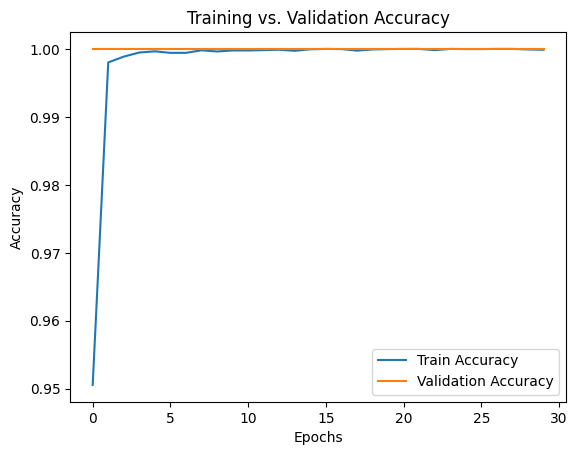

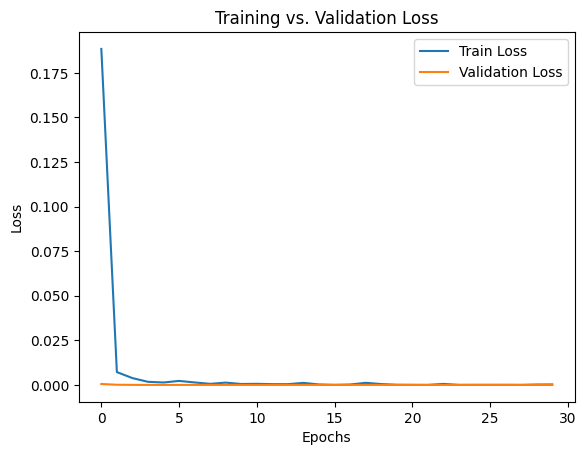

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs. Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs. Validation Loss')
plt.show()


In [ ]:
model.save("gesture_recognition_model.h5")


In [ ]:
from tensorflow.keras.models import load_model

model = load_model('gesture_recognition_model.h5')

def predict_gesture(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img.reshape(1, IMG_SIZE, IMG_SIZE, 1) / 255.0  # Normalize and reshape
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    label = list(gesture_label_map.keys())[list(gesture_label_map.values()).index(predicted_class)]
    print(f"Predicted Gesture: {label}")

predict_gesture("/home/eshu/Downloads/images (1).jpeg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 641ms/step
Predicted Gesture: BRING


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


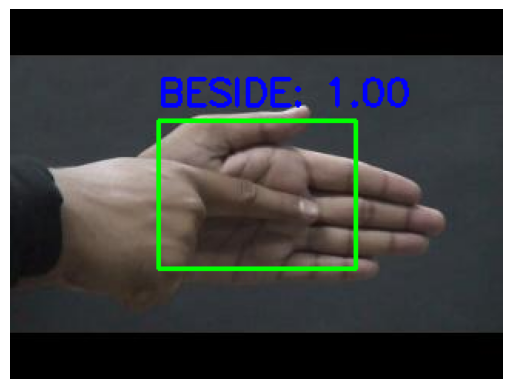

Predicted Gesture: BESIDE with confidence 1.00


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

model = load_model('gesture_recognition_model.h5')
IMG_SIZE = 64  

gesture_label_map = {
    0: 'ABOVE',
    1: 'ACROSS',
    2: 'ADVANCE',
    3: 'AFRAID',
    4: 'ALL',
    5: 'ALONE',
    6: 'ARISE',
    7: 'BAG',
    8: 'BELOW',
    9: 'BRING',
    10: 'YES',
    11: 'ABOARD',
    12: 'ANGER',
    13: 'ASCEND',
    14: 'BESIDE',
    15: 'DRINK',
    16: 'FLAG',
    17: 'HANG',
    18: 'MARRY',
    19: 'MIDDLE',
    20: 'MOON',
    21: 'PRISONER',
    22: 'ALL GONE'
}

def predict_and_visualize(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    input_img = img_resized.reshape(1, IMG_SIZE, IMG_SIZE, 1) / 255.0  
    
    prediction = model.predict(input_img)
    predicted_class = np.argmax(prediction)
    confidence = prediction[0][predicted_class] 
    label = gesture_label_map.get(predicted_class, "Unknown Gesture")
    
    img_color = cv2.imread(image_path)  
    height, width = img_color.shape[:2]
    box_x, box_y, box_w, box_h = int(0.3 * width), int(0.3 * height), int(0.4 * width), int(0.4 * height)
    
    cv2.rectangle(img_color, (box_x, box_y), (box_x + box_w, box_y + box_h), (0, 255, 0), 2)
    text = f"{label}: {confidence:.2f}"
    cv2.putText(img_color, text, (box_x, box_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)
    
    plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    print(f"Predicted Gesture: {label} with confidence {confidence:.2f}")


predict_and_visualize("/home/eshu/Downloads/ISL Gesture dataset/ISL_G015/BESIDE_Static/Gallery_list/set1/1.jpg")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


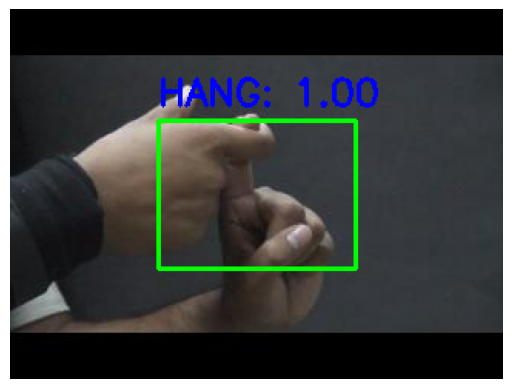

Predicted Gesture: HANG with confidence 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


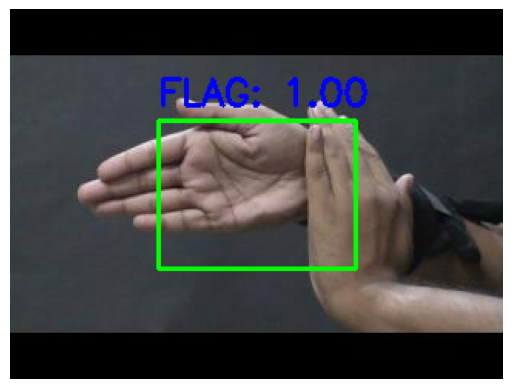

Predicted Gesture: FLAG with confidence 1.00
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


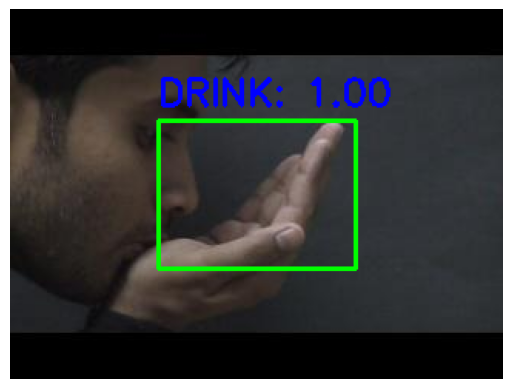

Predicted Gesture: DRINK with confidence 1.00


In [ ]:

predict_and_visualize("/home/eshu/Downloads/ISL Gesture dataset/ISL_G018/HANG_Static/Gallery_list/set1/1.jpg")


predict_and_visualize("/home/eshu/Downloads/ISL Gesture dataset/ISL_G017/FLAG_Static/Gallery_list/set1/1.jpg")


predict_and_visualize("/home/eshu/Downloads/ISL Gesture dataset/ISL_G016/DRINK_Static/Gallery_list/set1/2.jpg")


In [ ]:
import numpy as np
import mediapipe as mp
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

X = np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = to_categorical((labels), num_classes=len(gesture_label_map)) 

X_flattened = X.reshape(X.shape[0], -1) 

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_flattened.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(23, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_flattened, y, epochs=25, batch_size=32, validation_split=0.2)
model.save("gesture_model_both_hands.h5")


Epoch 1/25
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 58s 41ms/step - accuracy: 0.7049 - loss: 0.9099 - val_accuracy: 0.0928 - val_loss: 18.5018
Epoch 2/25
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 48s 39ms/step - accuracy: 0.9393 - loss: 0.1676 - val_accuracy: 0.0951 - val_loss: 23.4094
Epoch 3/25
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 44s 35ms/step - accuracy: 0.9607 - loss: 0.1101 - val_accuracy: 0.1351 - val_loss: 23.5762
Epoch 4/25
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 47s 38ms/step - accuracy: 0.9562 - loss: 0.1292 - val_accuracy: 0.1611 - val_loss: 25.1913
Epoch 5/25
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 46s 37ms/step - accuracy: 0.9675 - loss: 0.0973 - val_accuracy: 0.0970 - val_loss: 21.2181
Epoch 6/25
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 50s 40ms/step - accuracy: 0.9631 - loss: 0.1009 - val_accuracy: 0.1046 - val_loss: 24.1687
Epoch 7/25
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 47s 38ms/step - accuracy: 0.9724 - loss: 0.0824 - val_accuracy: 0.1509 - val_loss: 23.5039
Epoch 8/25
1244/1244 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0

In [ ]:
pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
try:
	api.authenticate()  
	print("Kaggle API authenticated successfully.")
except Exception as e:
	print(f"Error during Kaggle API authentication: {e}")
	raise

api.dataset_download_files('ayuraj/asl-dataset', path='asl_data', unzip=True)


Kaggle API authenticated successfully.
Dataset URL: https://www.kaggle.com/datasets/ayuraj/asl-dataset


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '/home/eshu/Downloads/asl_data/asl_dataset'
DATASET_PATH='/home/eshu/Downloads/asl_data/asl_dataset'

train_images_path = os.path.join(data_dir, 'train_images.npy')
train_labels_path = os.path.join(data_dir, 'train_labels.npy')

if not os.path.exists(train_images_path) or not os.path.exists(train_labels_path):
    print(f"Required dataset files not found in '{data_dir}'. Using dataset from '{DATASET_PATH}'.")

    train_images = np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
    train_labels = labels

else:
    train_images = np.load(train_images_path)
    train_labels = np.load(train_labels_path)

train_images = train_images / 255.0

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

train_images = train_images / 255.0

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

model = models.Sequential([
    layers.Input(shape=(64, 64, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')  # Match the number of classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

model.save('asl_gesture_model.h5')


Required dataset files not found in '/home/eshu/Downloads/asl_data/asl_dataset'. Using dataset from '/home/eshu/Downloads/asl_data/asl_dataset'.


NameError: name 'images' is not defined

: 